In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

### Gradient Descent

#### This Assignment

In this assignment, We will implement gradient descent, and show how it can be used to minimize differentiable functions, even including loss functions for non-linear models.

Note that this assignment will use bold notation to represent vectors, i.e. $\mathbf{x}$.


## Point Distribution
| Question | Points | 
|----------|--------|
| 1 | 1 |
| 2 | 2 |
| 3a | 2 |
| Total | 5 | 

# Part 1: Gradient Descent

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
np.set_printoptions(4)

# We will use plot_3d helper function to help us visualize gradients
from utils_0 import plot_3d

%matplotlib inline

## Load Data
Load the data.csv file into a pandas dataframe.  
Note that we are reading the data directly from the URL address.

In [4]:
# Run this cell to load our sample data

part_1_data = pd.read_csv("https://github.com/DS-100/su20/raw/gh-pages/resources/assets/datasets/hw7_data.csv", index_col=0)
part_1_data.head()

,x,y
0,-5.000000,-7.672309
1,-4.966555,-7.779735
2,-4.933110,-7.995938
3,-4.899666,-8.197059
4,-4.866221,-8.183883


---
## A Simple Model
Let's start by examining our data and creating a simple model that can represent this data.

First, run the cell below to visualize our data.

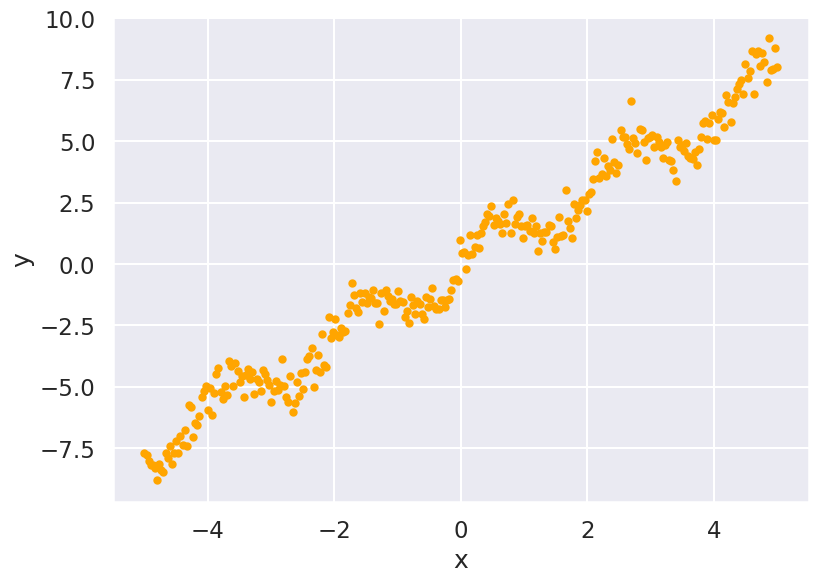

In [5]:
def scatter(x, y):
    """
    Generate a scatter plot using x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='.',c='orange')
    plt.xlabel('x')
    plt.ylabel('y')
    
x = part_1_data['x']
y = part_1_data['y']
scatter(x,y)

The data looks roughly linear, with some extra sinusoidal noise. For now, let's assume that the data follows some underlying linear model. We define the underlying linear model that predicts the value $y$ using the value $x$ as: $f_{\theta^*}(x) = \theta^* \cdot x$

Since we cannot find the value of the population parameter $\theta^*$ exactly, we will assume that our dataset approximates our population and use our dataset to estimate $\theta^*$. We denote an estimate with $\theta$ and the fitted estimated chosen based on the data as $\hat{\theta}$. Our parameterized model is:

$$\Large
f_{\theta}(x) = \theta \cdot x
$$

Based on this equation, we will define the linear model function `linear_model` below to estimate $\textbf{y}$ (the $y$-values) given $\textbf{x}$ (the $x$-values) and $\theta$.

In [6]:
def linear_model(x, theta):
    """
    Returns the estimate of y given x and theta

    Keyword arguments:
    x -- the vector of values x
    theta -- the scalar theta
    """
    return theta * x

the squared loss function is smooth and continuous. Let's use squared loss to evaluate our estimate $\theta$, which we will use later to identify an optimal $\theta$, denoted $\hat{\theta}$. Given observations $y$ and their corresponding predictions $\hat{y}$, we can compute the average loss:

In [7]:
def average_squared_loss(y, y_hat):
    """
    Returns the averge squared loss for observations y and predictions y_hat.

    Keyword arguments:
    y -- the vector of true values y
    y_hat -- the vector of predicted values y_hat
    """
    return np.mean((y - y_hat) ** 2)

Finally, we will visualize the average squared loss as a function of $\theta$, where several different values of $\theta$ are given.

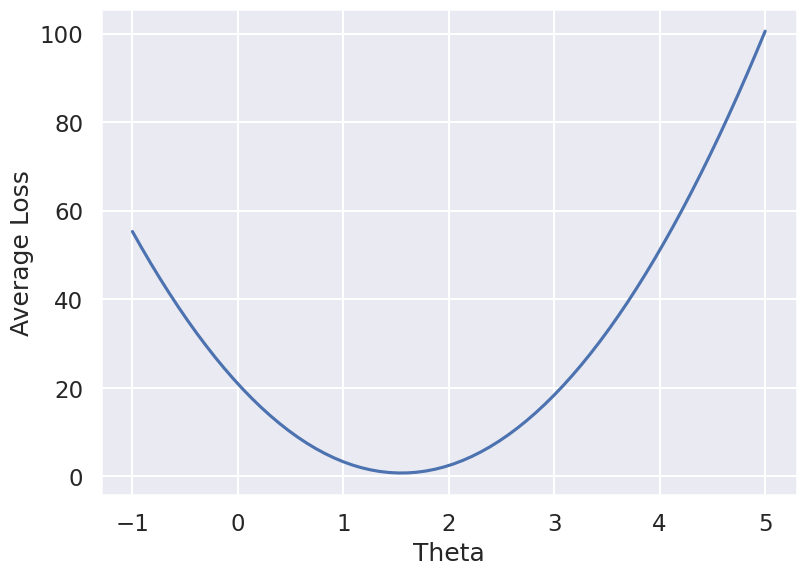

In [8]:
def visualize(x, y, thetas):
    """
    Plots the average l2 loss for given x, y as a function of theta.
    Use the functions you wrote for linear_model and l2_loss.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    thetas -- an array containing different estimates of the scalar theta
    """ 
    avg_loss = np.array([average_squared_loss(linear_model(x, theta), y) for theta in thetas])
    plt.figure(figsize=(8,6))
    plt.plot(thetas, avg_loss)
    plt.xlabel("Theta")
    plt.ylabel("Average Loss")
    
thetas = np.linspace(-1, 5, 70)
visualize(x, y, thetas)

You should notice that $\hat{\theta}$ is approximately 1.5. 

---
## Fitting our Simple Model
Now that we have defined a simple linear model and loss function, let's begin working on fitting our model to the data.

### Question 1
Let's confirm our visual findings for the optimal $\hat{\theta}$.

Recall from homework 5 that the analytical solution for the optimal $\hat{\theta}$ for the average squared loss is: 

$$\hat{\theta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$$

Now that we have the analytic solution for $\hat{\theta}$, implement the function `find_theta` that calculates the numerical value of $\hat{\theta}$ based on our data $\textbf{x}$, $\textbf{y}$.

<!--
BEGIN QUESTION
name: q1
points: 1
-->

In [9]:
def find_theta(x, y):
    """
    Find optimal theta given x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    
    #write your answer here
    theta_hat = np.sum(x * y) / np.sum(x ** 2)
    return theta_hat

theta_hat_simple = find_theta(x, y)
print(f'theta_hat = {theta_hat_simple}')

theta_hat = 1.550264808596222


In [10]:
grader.check("q1")

KeyError: 'otter'

Now, let's plot our risk function again using the `visualize` function. But this time, we will add a vertical line at the optimal value of theta (plot the line $\theta = \hat{\theta}$).

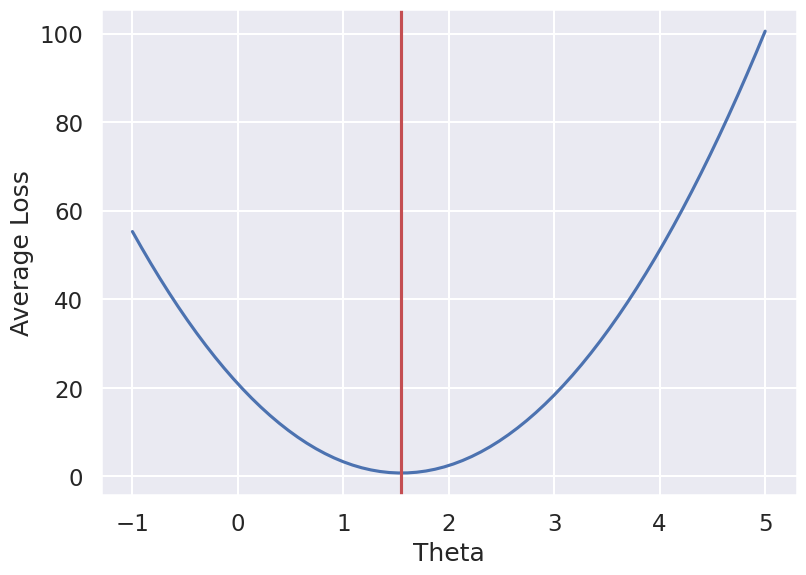

In [11]:
theta_opt = find_theta(x, y)
visualize(x, y, thetas)
plt.axvline(x=theta_opt, color='r')

We now have an optimal value for $\theta$ that minimizes the empirical risk. We can use the scatter plot of the data and add the line $f_{\hat{\theta}}(x) = \hat{\theta} \cdot \textbf{x}$ using the $\hat{\theta}$ computed above.

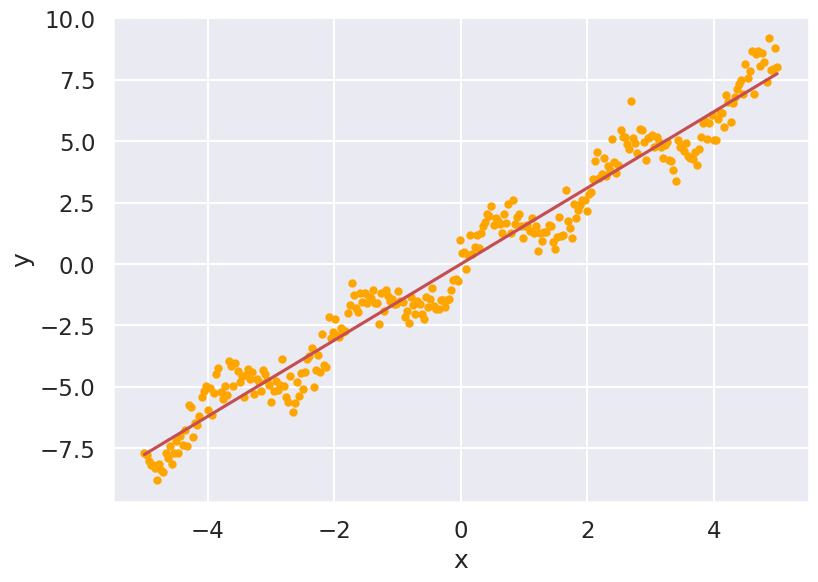

In [12]:
theta_opt_2 = find_theta(x, y)
scatter(x, y)
line_values = linear_model(x, theta_opt_2)
plt.plot(x, line_values, color='r');

Great! It looks like our estimator $f_{\hat{\theta}}(x)$ is able to estimate the average $y$ for each $x$ quite well using a single parameter $\theta$. 

The difference between the true $y$'s and the predictions is known as the residual, $\textbf{r}=\textbf{y}-\hat{\theta} \cdot \textbf{x}$. Below, we find the residual and plot the residuals corresponding to $x$ in a scatter plot. We also plot a horizontal line at $y=0$ to assist visualization.

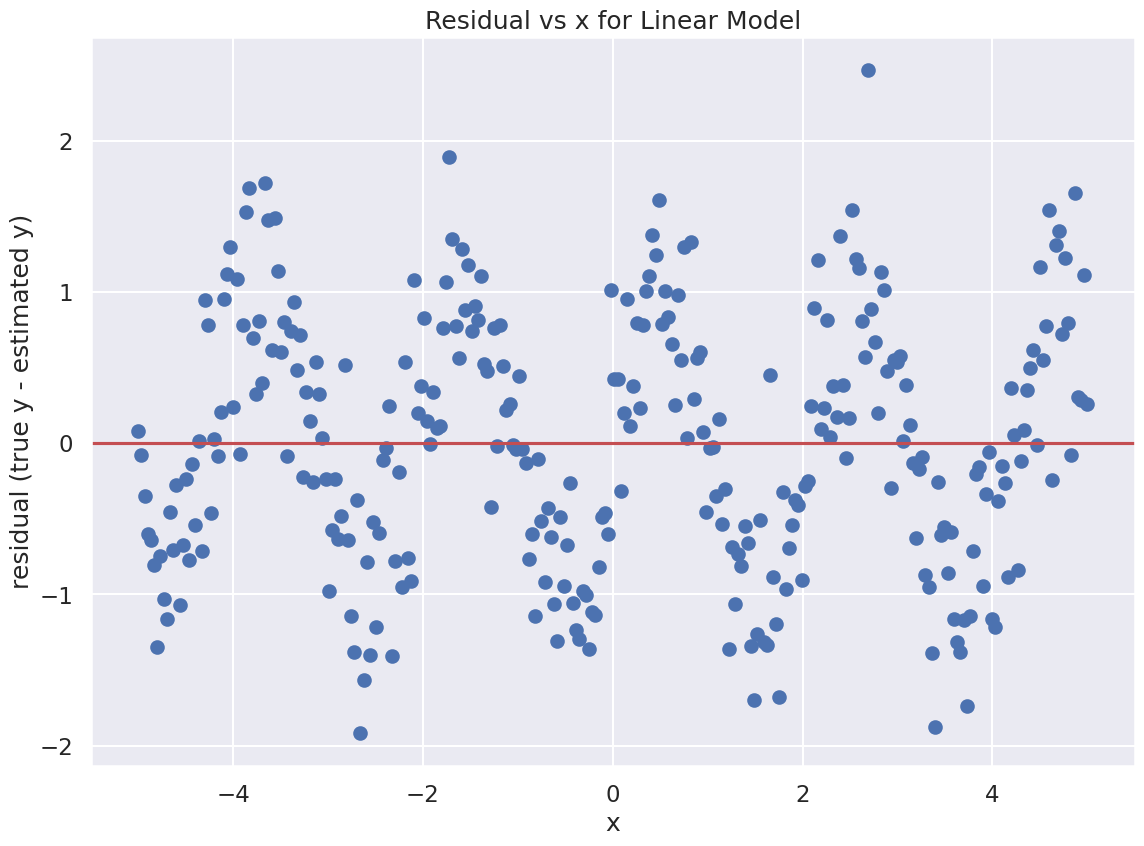

In [13]:
def visualize_residual(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    ...
    theta_hat = find_theta(x, y)
    y_sin = y - linear_model(x, theta_hat)
    plt.scatter(x, y_sin)
    plt.xlabel('x')
    plt.ylabel('residual (true y - estimated y)')
    plt.title('Residual vs x for Linear Model')
    plt.axhline(y=0, color='r')

visualize_residual(x, y)

## 2: Increasing Model Complexity

It looks like the residual is sinusoidal, meaning our original data follows a linear function and a sinusoidal function. Let's define a new model to address this discovery and find optimal parameters to best fit the data:

$$ ( f_{\boldsymbol{\theta}}(x) = \theta_1x + \sin(\theta_2x) ) $$



Now, our model is parameterized by both $\theta_1$ and $\theta_2$, which we can represent in the vector, $\boldsymbol{\theta}$.

Note that a general sine function $a\sin(bx+c)$ has three parameters: amplitude scaling parameter $a$, frequency parameter $b$ and phase shifting parameter $c$. Looking at the residual plot above, it looks like the residual is zero at x = 0, and the residual swings between -1 and 1. Thus, it seems reasonable to effectively set the scaling and phase shifting parameter ($a$ and $c$ in this case) to 1 and 0 respectively. While we could try to fit $a$ and $c$, we're unlikely to get much benefit. When you're done with this assignment, you can try adding $a$ and $c$ to our model and fitting these parameters to see if you can get a better loss.

We define the `sin_model` function below that predicts $\textbf{y}$ (the $y$-values) using $\textbf{x}$ (the $x$-values) based on our new equation.

In [14]:
def sin_model(x, theta):
    """
    Predict the estimate of y given x, theta_1, theta_2

    Keyword arguments:
    x -- the vector of values x
    theta -- a vector of length 2, where theta[0] = theta_1 and theta[1] = theta_2
    """
    theta_1 = theta[0]
    theta_2 = theta[1]
    return theta_1 * x + np.sin(theta_2 * x)

<!-- END QUESTION -->

### Question 2
Now, implement the functions `sin_MSE`, `sin_MSE_dt1` and `sin_MSE_dt2`, which should compute $R$, $\frac{\partial R }{\partial \theta_1}$ and $\frac{\partial R }{\partial \theta_2}$ respectively. Use the expressions you wrote for $\frac{\partial R }{\partial \theta_1}$ and $\frac{\partial R }{\partial \theta_2}$ in the previous exercise. In the functions below, the parameter `theta` is a vector that looks like $( \theta_1, \theta_2 )$. We have completed `sin_MSE_gradient` for you.

Notes: 
* Keep in mind that we are still working with our original set of data, `part_1_data`
* To keep your code a bit more concise, be aware that `np.mean` does the same thing as `np.sum` divided by the length of the numpy array.

<!--
BEGIN QUESTION
name: q2
points: 2
-->

In [15]:
def sin_MSE(theta):
    """
    Compute the numerical value of the l2 loss of our sinusoidal model given theta

    Keyword arguments:
    theta -- the vector of values theta
    """
    
    #write your answer here
    y_pred = sin_model(x, theta)
    return np.mean((y - y_pred) ** 2)

def sin_MSE_dt1(theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_1

    Keyword arguments:
    theta -- the vector of values theta
    """

    #write your answer here
    y_pred = sin_model(x, theta)
    return np.mean(2 * (y_pred - y) * x)
    
def sin_MSE_dt2(theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_2

    Keyword arguments:
    theta -- the vector of values theta
    """
    
    #write your answer here
    y_pred = sin_model(x, theta)
    return np.mean(2 * (y_pred - y) * np.sin(theta[1] * x) * x)

# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def sin_MSE_gradient(theta):
    """
    Returns the gradient of l2 loss with respect to vector theta

    Keyword arguments:
    theta -- the vector of values theta
    """
    x = part_1_data['x']
    y = part_1_data['y']     
    return np.array([sin_MSE_dt1(theta), sin_MSE_dt2(theta)])

In [16]:
abs(sin_MSE_dt2([0, np.pi]))

0.11332981246057215

In [17]:
grader.check("q2")

KeyError: 'otter'

## 3: Gradient Descent


Let's now implement gradient descent. 

Note that the function you're implementing here is somewhat different than the gradient descent function we created in lecture. The version in lecture was `gradient_descent(df, initial_guess, alpha, n)`, where `df` was the gradient of the function we are minimizing and `initial_guess` are the starting parameters for that function. Here our signature is a bit different (described below).

### Question 3
Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in an array for $\textbf{x}$ (`x`), an array for $\textbf{y}$ (`y`), and an initial value for $\theta$ (`theta`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate (i.e. the same learning rate at every time step), just like in lecture.

At each time step, use the gradient and `alpha` to update your current `theta`. Also at each time step, be sure to save the current `theta` in `theta_history`, along with the average squared loss (computed with the current `theta`) in `loss_history`.

After completing the function, the cell will output the trajectory from running gradient descent over time.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times.
- Recall that the gradient descent update function follows the form:
$$ 
\boldsymbol{\theta}^{(t+1)} \leftarrow \boldsymbol{\theta}^{(t)} - \alpha \left(\nabla_{\boldsymbol{\theta}} \mathbf{R}(\mathbf{x}, \mathbf{y}, \boldsymbol{\theta}^{(t)}) \right)
$$
- Be sure to include the initial theta and loss into the trajectory because the test checks for this.

<!--
BEGIN QUESTION
name: q3a
points: 2
-->

In [18]:
def init_theta():
    """Creates an initial theta [0, 0] of shape (2,) as a starting point for gradient descent"""
    return np.zeros((2,))

def grad_desc(loss_f, gradient_loss_f, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    loss_f -- the loss function to be minimized (used for computing loss_history)
    gradient_loss_f -- the gradient of the loss function to be minimized
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = [theta]
    loss_history = [loss_f(theta)]
    
    #write your answer here
    for _ in range(num_iter):
        gradient = gradient_loss_f(theta)
        theta = theta - alpha * gradient
        theta_history.append(theta)
        loss_history.append(loss_f(theta))
   
    return theta, theta_history, loss_history

theta_start = init_theta()
theta_hat, thetas_used, losses_calculated = grad_desc(sin_MSE, sin_MSE_gradient, theta_start, num_iter=20, alpha=0.1)
for b, l in zip(thetas_used, losses_calculated):
    print(f"theta: {b}, Loss: {l}")

theta: [0. 0.], Loss: 20.859191416422235
theta: [2.6011 0.    ], Loss: 9.960476443146465
theta: [0.838 0.   ], Loss: 4.953246133914271
theta: [2.033 0.   ], Loss: 2.6527588350747027
theta: [1.223 0.   ], Loss: 1.5958388443236267
theta: [1.7721 0.    ], Loss: 1.1102548259233778
theta: [1.3999 0.    ], Loss: 0.8871614593591088
theta: [1.6522 0.    ], Loss: 0.7846649843537161
theta: [1.4812 0.    ], Loss: 0.7375747120147373
theta: [1.5971 0.    ], Loss: 0.7159398826331169
theta: [1.5185 0.    ], Loss: 0.7060001260948142
theta: [1.5718 0.    ], Loss: 0.7014334730236017
theta: [1.5357 0.    ], Loss: 0.6993354014870955
theta: [1.5601 0.    ], Loss: 0.6983714779957214
theta: [1.5436 0.    ], Loss: 0.6979286196464918
theta: [1.5548 0.    ], Loss: 0.6977251558661841
theta: [1.5472 0.    ], Loss: 0.6976316778726696
theta: [1.5524 0.    ], Loss: 0.6975887309891591
theta: [1.5489 0.    ], Loss: 0.6975689997697146
theta: [1.5512 0.    ], Loss: 0.6975599345945739
theta: [1.5496 0.    ], Loss: 0.6975

In [19]:
grader.check("q3a")

KeyError: 'otter'